# ІМТР - частина 1.1
Петровського Андрія Анатолійовича (РТ-01ф)


### Завдання 3
$ \varphi = kl$ - фазова довжина неоднорідності
$ k=\frac{2\pi }{\lambda } $ - хвилове число
$ \lambda =\frac{\nu }{f} $ - довжина хвилі

Звідси можна виразити
$$ \varphi = \frac{2\pi lf}{\nu } $$

Також відомо, що:
$ F= \frac{f}{f_{0}} \Rightarrow f= F\cdot f_{0} $
$ l=\frac{\lambda _{0}}{4} $ та $ \lambda _{0} = \frac{\nu }{f_{0}} \Rightarrow f_{0} = \frac{\nu }{\lambda _{0}} $

Тепер можна підставити усі значення для отримання кінцевої формули:
$$ \varphi = \frac{2\pi \frac{\lambda _{0}}{4}F\frac{\nu }{\lambda _{0}}}{\nu } = \frac{\pi }{2} F $$


### Завдання 4

In [309]:
import numpy as np

Створимо функцію для визначення $ \varphi(F) $

In [268]:
def fi(f):
    return pi/2*f

Також задамо значення для імпедансу барʼєру та ями

In [269]:
zb=5
zy=1/5

Створимо функції обрахунку імпедансів згідно формули
$$ z_{i} = \frac{1+iztg\varphi }{1+iz^{-1}tg\varphi } $$

In [270]:
import cmath
def z1(f):
    return complex(1,zy*np.tan(fi(f)))/complex(1,1/zy*np.tan(fi(f)))

In [271]:
def z2(f):
    return complex(1,zb*np.tan(fi(f)))/complex(1,1/zb*np.tan(fi(f)))

Задамо функції для визначення коефіцієнтів відбиття та проходження згідно з формул
$$ R = \frac{1-Z_{i}}{1+Z_{i}} $$
$$ T = \sqrt{1-\left | Z_{i} \right |^{2}} $$

In [272]:
def r(f):
    return (1-z2(f))/(1+z2(f))

In [273]:
def t(f):
    return np.sqrt(1-pow(abs(r(f)),2))

### Завдання 5
Створимо масив для значень частоти та обчислимо значення функцій

In [274]:
ff = np.arange(0,5,0.01)

In [275]:
rVec = np.vectorize(r)
tVec = np.vectorize(t)

In [276]:
r1v = np.abs(rVec(ff))

In [277]:
t1v = tVec(ff)

Відобразимо результати на графіку

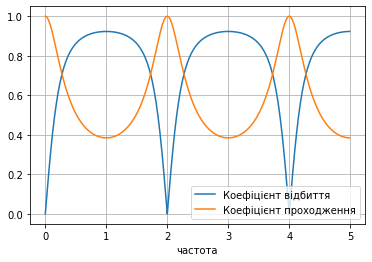

In [331]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(ff,r1v, label='Коефіцієнт відбиття')
ax.plot(ff,t1v, label='Коефіцієнт проходження')
ax.grid(True)
plt.xlabel('частота')
#ax.ylabel('r')
ax.legend()
#plt.legend()
plt.show()

### Задання 6
На нормованій частоті 1F видно, що коефіцієнт проходження досягає мінімального значення, що означає непроходження хвилі. Таке ж явище можна спостерішати і на всіх непарних частотах.
На парних частотах можна побачити повне проходження хвилі - це означає, що вхідний імпеданс системи дорівнює імпедансу середовища

### Завдання 7
Взявши систему з двома неоднорідностями у вигляді барʼєру та ями та довжиною чверть довжини хвилі на частоті F, можна отримати резонансне проходження на частоті 2F

### Завдання 8
Для отримання можливості дослідження моделі необхідно змінити наші початкові функції, додавши до них залежність від довжини хвилі та вхідного імпедансу.
Створимо вектор в якому імпенс буде мати значення від 3 до 5

In [279]:
z8=np.arange(3,5.5,0.5)

Зробимо імпеданс ями, як функцію від імпедансу барʼєру та своримо вектор для довжини хвилі

In [280]:
def zy8(zz):
    return 1/zz

In [281]:
l8 = np.arange(0.2,2.1,0.1)

Підставивши нові вимоги у формулу $ \varphi(F) $ в пункті 3 отримаємо:
$$ \varphi(F,l) = \frac{2\pi \frac{\lambda _{0}}{4}lF\frac{\nu }{\lambda _{0}}}{\nu } = \frac{\pi }{2} lF $$
Запишемо функцію

In [282]:
def fi8(f,ll):
    return pi*ll*f/2

Підставимо це формулу для знаходження нормованого вхідного імпедансу
$$ Z(F,l,z_{н}) = \frac{1+iztg(\varphi(F,l))))}{1+iz^{-1}tg(\varphi(F,l))))} $$
та перепишемо функції коефіцієнтів відбиття та проходження

In [283]:
def z8_1(f,ll,z):
    return complex(1,zy8(z)*np.tan(fi8(f,ll)))/complex(1,1/zy8(z)*np.tan(fi8(f,ll)))

In [284]:
def z8_2(f,ll,z):
    return complex(1,z*np.tan(fi8(f,ll)))/complex(1,1/z*np.tan(fi8(f,ll)))

In [285]:
def r8(f,ll,z):
    return (1-z8_2(f,ll,z))/(1+z8_2(f,ll,z))

In [286]:
def t8(f,ll,z):
    return np.sqrt(1-pow(abs(r8(f,ll,z)),2))

In [287]:
r8vec = np.vectorize(r8)
t8vec= np.vectorize(t8)

Перевіримо чи працює дана функція, підставивши значення з пункту 5

In [288]:
r8_1d = np.abs(r8vec(ff,1,5))
t8_1d = t8vec(ff,1,5)

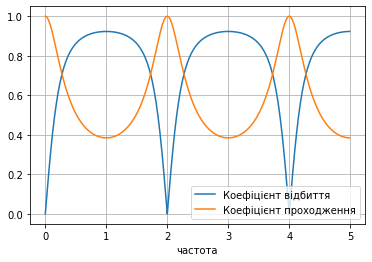

In [333]:
ax1 = plt.subplot(111)
ax1.plot(ff,r8_1d, label='Коефіцієнт відбиття')
ax1.plot(ff,t8_1d, label='Коефіцієнт проходження')
plt.grid(True)
plt.xlabel('частота')
ax1.legend()
plt.show()

Як бачимо дана модель є правильною, тому можна дослідити її при різних значеннях довжини хвилі та імпедансу

In [311]:
t8_1_3 = t8vec(ff,1,3)
t8_1_35 = t8vec(ff,1,3.5)
t8_1_4 = t8vec(ff,1,4.5)

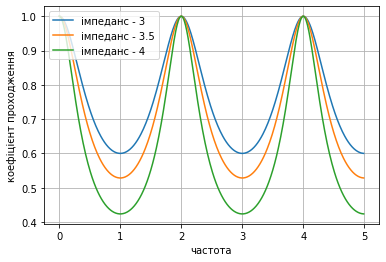

In [334]:
ax2 = plt.subplot(111)
ax2.plot(ff,t8_1_3, label='імпеданс - 3')
ax2.plot(ff,t8_1_35,  label='імпеданс - 3.5')
ax2.plot(ff,t8_1_4,  label='імпеданс - 4')
plt.grid(True)
plt.xlabel('частота')
plt.ylabel('коефіцієнт проходження')
ax2.legend()
plt.show()

Дивлячись на ці графіки можна побачити, що чим більше значення імпедансу, ти більше є подавлення на частоті (n-1)F та вужчою смуга пропускання на частотах 2F

In [292]:
t8_07_5 = t8vec(ff,0.7,5)
t8_12_5 = t8vec(ff,1.2,5)
t8_18_5 = t8vec(ff,1.8,5)

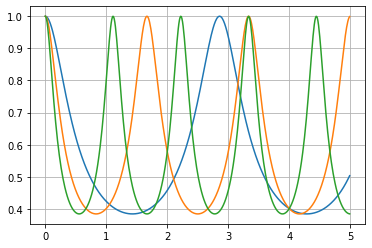

In [293]:
plt.plot(ff,t8_07_5)
plt.plot(ff,t8_12_5)
plt.plot(ff,t8_18_5)
plt.grid(True)
plt.show()

### Завдання 9

In [294]:
def rez2(f):
    return np.real(z2(f))

In [295]:
def imz2(f):
    return np.imag(z2(f))

In [296]:
rez2vec=np.vectorize(rez2)
imze2vec=np.vectorize(imz2)

In [297]:
rez2vals = rez2vec(ff)
imz2vals = imze2vec(ff)

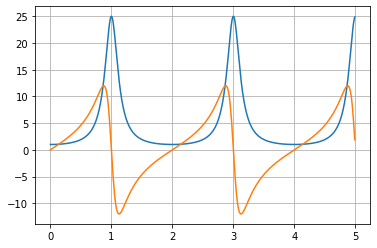

In [298]:
plt.plot(ff,rez2vals)
plt.plot(ff,imz2vals)
plt.grid(True)
plt.show()

### завдання 10

In [299]:
z0 = 1
def zl(f):
    return 2*pi*zb*z0*f/4

def zll(f):
    return complex(1,zl(f))

In [300]:
zlvec = np.vectorize(zll)


f10_1 = np.arange(0,1,0.1)
zlvalues = np.imag(zlvec(f10_1))

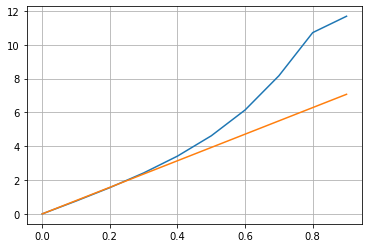

In [301]:
plt.plot(f10_1, imze2vec(f10_1))
plt.plot(f10_1,zlvalues)
plt.grid(True)
plt.show()

In [302]:
def zc(f):
    return 2*zy*z0/pi/f

def zcc(f):
    return complex(0,-zc(f))/(complex(1,-zc(f)))

In [303]:
zcvec = np.vectorize(zcc)
fff = np.arange(0.001,5,0.1)

In [304]:
zcvalues = np.imag(zcvec(fff))
imz2vals2 = imze2vec(fff)

In [305]:
def z1im(f):
    return np.imag(z1(f))

In [306]:
f10_2 = np.arange(0.001,1,0.1)
z1im_vec = np.vectorize(z1im)
z1im_vals = z1im_vec(f10_2)

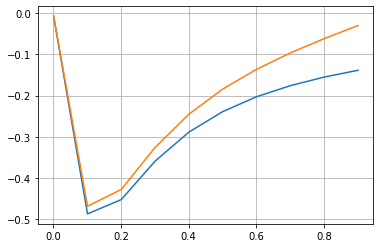

In [307]:
plt.plot(f10_2,np.imag(zcvec(f10_2)))
plt.plot(f10_2, z1im_vals)
plt.grid(True)
plt.show()